# Boston Housing Data
## Exploratory Data Analysis
##### CRIM: Per capita crime rate by town
##### ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
##### INDUS: Proportion of non-retail business acres per town
##### CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
##### NOX: Nitric oxide concentration (parts per 10 million)
##### RM: Average number of rooms per dwelling
##### AGE: Proportion of owner-occupied units built prior to 1940
##### DIS: Weighted distances to five Boston employment centers
##### RAD: Index of accessibility to radial highways
##### TAX: Full-value property tax rate per 10000 dollars
##### PTRATIO: Pupil-teacher ratio by town
##### B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
##### LSTAT: Percentage of lower status of the population
##### MEDV: Median value of owner-occupied homes in $1000s










In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_test=pd.read_csv("boston_housing_test.csv")
data_train=pd.read_csv("boston_housing_train.csv")

data_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
print("Here are the dimensions of the training set: ",data_train.shape)
print("Here are the Data Types of each feature in the data set : ",data_train.dtypes)
print("Here are the Column names of each feature in the data set: ",data_train.columns)


Here are the dimensions of the training set:  (333, 15)
Here are the Data Types of each feature in the data set :  ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object
Here are the Column names of each feature in the data set:  Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [4]:
combined=pd.concat([data_train,data_test] , sort=False, ignore_index=True)

In [5]:
print("Dmensions of The training set: ",data_train.shape)
print("Dimensions of the test set: ",data_test.shape)
print("Dimensions of the Combined : ",combined.shape)


Dmensions of The training set:  (333, 15)
Dimensions of the test set:  (173, 14)
Dimensions of the Combined :  (506, 15)


In [6]:
"""Exploratory Data Analysis: Checking what features correlate by creating a correlation matrix"""

corelation=combined.corr()
corelation.style.background_gradient(cmap="coolwarm")
    

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1,0.407407,-0.103393,0.399439,-0.00375911,0.398736,-0.0799712,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.221694
crim,0.407407,1,-0.200469,0.406583,-0.0558916,0.420972,-0.219247,0.352734,-0.37967,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.407454
zn,-0.103393,-0.200469,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.344842
indus,0.399439,0.406583,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.473932
chas,-0.00375911,-0.0558916,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.20439
nox,0.398736,0.420972,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.413054
rm,-0.0799712,-0.219247,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.689598
age,0.203784,0.352734,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.358888
dis,-0.302211,-0.37967,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249422
rad,0.686002,0.625505,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.352251


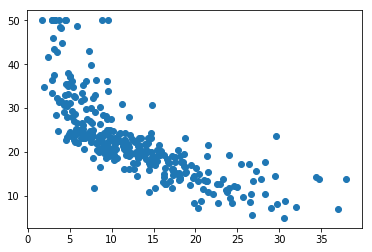

In [7]:
"""There is a negative corellation between LStat and Prices of Houses

Places with more lower status of population have less expensive houses"""
plt.scatter(combined["lstat"],combined["medv"])

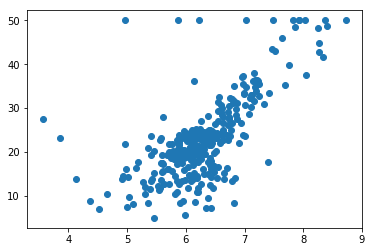

In [8]:
"""Prices obviously go higher when the numebr of rooms per dwelling increase"""
plt.scatter(combined["rm"],combined["medv"])

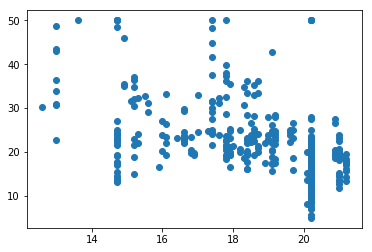

In [9]:
"""Prices of Student-Teacher Ratio pitted against the prices of houses"""
plt.scatter(combined["ptratio"],combined["medv"])

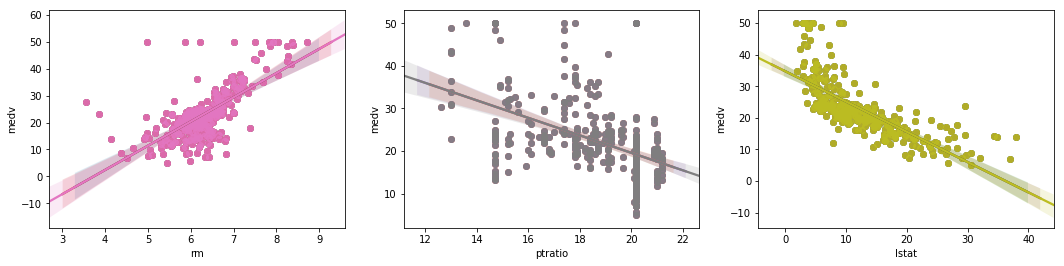

In [10]:
fig,axs=plt.subplots(ncols=3,figsize=(18,4))
for i in range(len(axs)):
    
    _ =sns.regplot(x=combined['rm'], y=combined["medv"],ax=axs[0])
    _ =sns.regplot(x=combined['ptratio'],y=combined['medv'],ax=axs[1])
    _ =sns.regplot(x=combined['lstat'],y=combined['medv'],ax=axs[2])

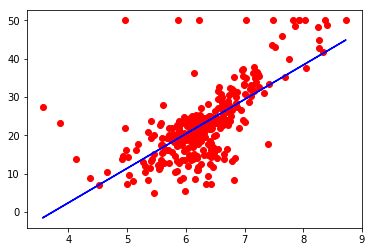

In [11]:
from sklearn.linear_model import LinearRegression
X_train=data_train['rm'].values
X_test=data_test['rm'].values
Y_train=data_train['medv'].values

linreg=LinearRegression()
linreg.fit(X_train.reshape(-1,1),Y_train)

predict=linreg.predict(X_train.reshape(-1,1)),

plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,linreg.predict(X_train.reshape(-1,1)),color="blue")



In [24]:
linreg.predict(X_train.reshape(-1,1)).shape

(333,)

In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_train,linreg.predict(X_train.reshape(-1,1)))

In [27]:
r2

0.4755455247485777